In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data cleaning

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

exploring data

In [10]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

([<matplotlib.patches.Wedge at 0x166e3158620>,
 [Text(-0.016800012982034103, 1.0998717014105799, 'female'),
  Text(0.01680011595945443, -1.0998716998376443, 'male')],
 [Text(-0.009163643444745873, 0.5999300189512253, '50.5%'),
  Text(0.009163699614247869, -0.5999300180932605, '49.5%')])

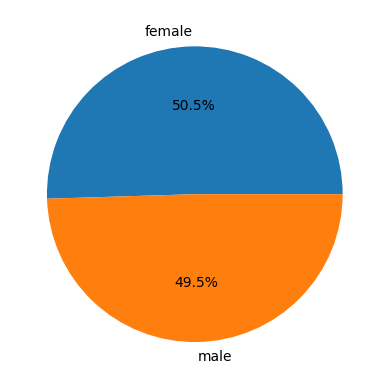

In [13]:
plt.pie(data['sex'].value_counts(),labels=data['sex'].unique(),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x166e51c5010>,
 [Text(-0.8797849777822367, 0.6602865990376524, 'yes'),
  Text(0.8797849468719889, -0.6602866402233593, 'no')],
 [Text(-0.4798827151539472, 0.36015632674781034, '79.5%'),
  Text(0.4798826982938121, -0.36015634921274137, '20.5%')])

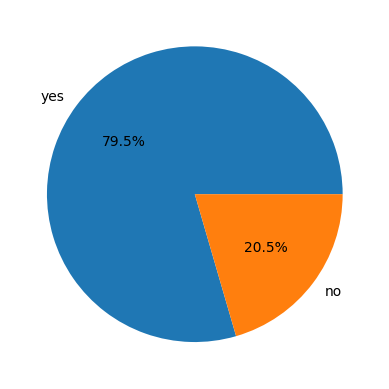

In [14]:
plt.pie(data['smoker'].value_counts(),labels=data['smoker'].unique(),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x166e51e3cb0>,
 [Text(0.7215890706705311, 0.8302464773119123, 'southwest'),
  Text(-0.8640286077747883, 0.6807749737958654, 'southeast'),
  Text(-0.7196362470877354, -0.8319397044723131, 'northwest'),
  Text(0.7963235543877186, -0.7588601957721266, 'northeast')],
 [Text(0.39359403854756236, 0.4528617148974066, '27.2%'),
  Text(-0.47128833151352084, 0.3713318038886538, '24.3%'),
  Text(-0.3925288620478557, -0.4537852933485344, '24.2%'),
  Text(0.43435830239330103, -0.41392374314843267, '24.2%')])

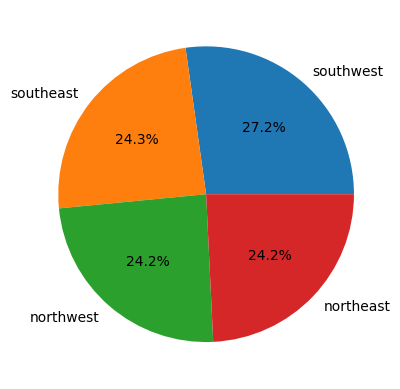

In [15]:
plt.pie(data['region'].value_counts(),labels=data['region'].unique(),autopct='%1.1f%%')

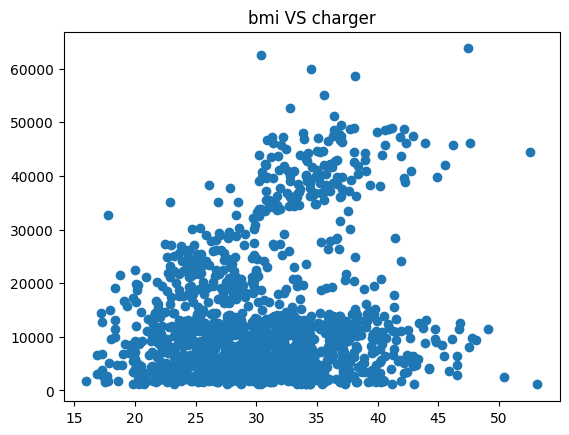

In [16]:
plt.title('bmi VS charger')
plt.scatter(data['bmi'],data['charges'])

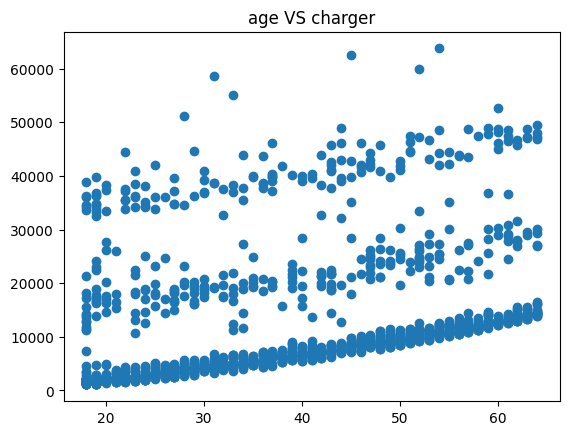

In [17]:
plt.title('age VS charger')
plt.scatter(data['age'],data['charges'])

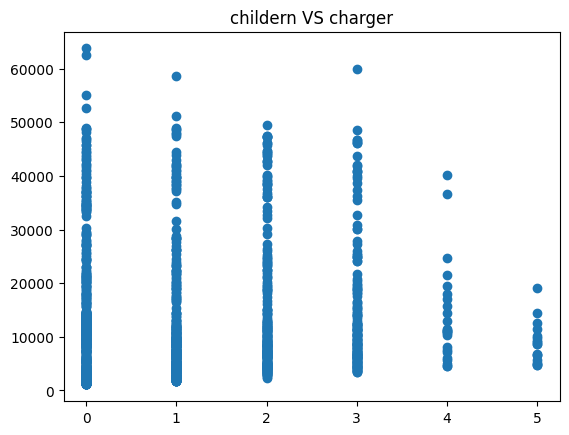

In [18]:
plt.title('childern VS charger')
plt.scatter(data['children'],data['charges'])

convert cat. to num.

In [19]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['region']=label.fit_transform(data['region'])
data.smoker=label.fit_transform(data.smoker)
data.sex=label.fit_transform(data.sex)

split the data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
y=data[['charges']]
x=data.drop('charges',axis=1)

In [22]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [23]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [24]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.3,random_state=44)

In [25]:
x_train.shape

(935, 6)

In [27]:
x_temp.shape

(402, 6)

In [28]:
y_temp.shape

(402, 1)

In [29]:
x_valid,x_test,y_valid,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=44)

In [30]:
x_train.shape

(935, 6)

In [31]:
x_valid.shape

(201, 6)

In [32]:
x_test.shape

(201, 6)

In [33]:
from sklearn.preprocessing import MinMaxScaler
min=MinMaxScaler(copy=True)

In [34]:
x_train=min.fit_transform(x_train)
x_test=min.fit_transform(x_test)
x_valid=min.fit_transform(x_valid)

In [35]:
x_train=pd.DataFrame(x_train,columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
x_train.head()

,age,sex,bmi,children,smoker,region
0,0.739130,0.0,0.388114,0.0,0.0,1.000000
1,0.043478,0.0,0.446708,0.0,0.0,1.000000
2,0.021739,1.0,0.408203,0.0,1.0,0.333333
3,0.891304,0.0,0.392299,0.0,0.0,0.333333
4,0.000000,1.0,0.582589,0.0,1.0,0.666667


In [36]:
x_valid=pd.DataFrame(x_valid,columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
x_valid.head()

,age,sex,bmi,children,smoker,region
0,0.152174,0.0,0.714637,0.2,0.0,0.666667
1,0.565217,0.0,0.268706,0.2,0.0,1.000000
2,0.021739,1.0,0.262015,0.0,0.0,0.333333
3,0.891304,1.0,0.259421,0.0,0.0,0.333333
4,0.782609,0.0,0.319088,0.2,0.0,0.333333


In [37]:
x_test=pd.DataFrame(x_test,columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
x_test.head()

,age,sex,bmi,children,smoker,region
0,0.065217,1.0,0.141547,0.2,0.0,1.000000
1,0.608696,1.0,0.754509,0.6,1.0,0.666667
2,0.739130,1.0,0.383063,0.2,0.0,1.000000
3,0.304348,1.0,0.535922,0.4,0.0,1.000000
4,0.608696,0.0,0.307857,0.0,0.0,0.333333


In [39]:
import math

In [54]:
def GradientD(x,y,w,b,alpha,iter_num,lamda):
    j_history=[]
    m=x.shape[0]
    def cost(w,b):
        total_cost=0
        for i in range(m):
             pred = np.dot(x.iloc[i].values, w) + b
             cost = (pred - y.iloc[i, 0])**2
             total_cost+=cost
        reg=(lamda/ (2*m))*(np.sum(w**2))
        return total_cost / m + reg
    def gradient(w,b):
        dj_dw=[0] * len(w)
        dj_db=0.
        for i in range(m):
            err=(np.dot(x.iloc[i],w)+b)- y.iloc[i]
            for j in range(len(w)):
                dj_dw[j] += err * x.iloc[i,j]
            dj_db+=err
        dj_dw = [dw / m for dw in dj_dw]
        dj_db=dj_db/m
        dj_dw = [dj + (lamda /m) * w[j] for j, dj in enumerate(dj_dw)]

        return dj_dw,dj_db
    for i in range(iter_num):
        dj_dw,dj_db=gradient(w,b)
        w= w - alpha * np.array(dj_dw)
        b= b - alpha * dj_db
        j = cost(w,b)
        J_history.append(J)
        if i % max(1, math.ceil(num_iters / 2)) == 0:
            print(f"Iteration {i}: Cost = {J}")

    return w, b, J_history
        
        
        
        

In [64]:
def batch(x, y, w, b, alpha, num_iters,lamda=0.1):
    m = x.shape[0]
    J_history = []

    def cost(w, b):
        total_cost = 0
        for i in range(m):
            pred = np.dot(x.iloc[i].values, w) + b
            cost = (pred - y.iloc[i, 0])**2
            total_cost += cost
        reg=(lamda/ (2*m))*(np.sum(w**2))
        return total_cost / m + reg

    def gradient(w, b):
        dj_dw = [0] * len(w)
        dj_db = 0.

        for i in range(m):
            err = (np.dot(x.iloc[i].values, w) + b) - y.iloc[i, 0]
            for j in range(len(w)):
                dj_dw[j] = dj_dw[j] + err * x.iloc[i, j]
            dj_db = dj_db + err
        dj_dw = [dj / m for dj in dj_dw]
        dj_db = dj_db / m
        dj_dw = [dj + (lamda /m) * w[j] for j, dj in enumerate(dj_dw)]

        return dj_db, dj_dw

    for i in range(num_iters):
        dj_db, dj_dw = gradient(w, b)
        w = w - alpha * np.array(dj_dw)
        b = b - alpha * dj_db
        J = cost(w, b)
        J_history.append(J)

 
        if i % max(1, math.ceil(num_iters / 1)) == 0:
            print(f"Iteration {i}: Cost = {J}")

    return w, b, J_history

In [83]:
W,B,j_hist=batch(x_train,y_train, w=np.array([0.05,0.05,0.05,0.05,0.05,0.05]), b=50, alpha=0.0001, num_iters=500)

Iteration 0: Cost = 324638245.89242935


In [84]:
W

array([344.74540362, 336.19951358, 256.14161713, 143.71539798,
       315.72550338, 314.01186108])

In [85]:
j_hist

[324638245.89242935,
 324557130.5961107,
 324476047.1017874,
 324394995.3966286,
 324313975.4678123,
 324232987.30251735,
 324152030.8879308,
 324071106.2112451,
 323990213.2596551,
 323909352.0203638,
 323828522.4805775,
 323747724.6275087,
 323666958.448375,
 323586223.9303983,
 323505521.06080675,
 323424849.8268316,
 323344210.215713,
 323263602.21469253,
 323183025.81101924,
 323102480.9919475,
 323021967.74473315,
 322941486.05664235,
 322861035.914943,
 322780617.3069087,
 322700230.21981925,
 322619874.64095956,
 322539550.55761874,
 322459257.9570898,
 322378996.8266752,
 322298767.15367717,
 322218568.9254081,
 322138402.1291807,
 322058266.75231725,
 321978162.7821429,
 321898090.20598686,
 321818049.01118535,
 321738039.18507934,
 321658060.7150157,
 321578113.5883432,
 321498197.79241914,
 321418313.31460553,
 321338460.14226794,
 321258638.2627773,
 321178847.6635106,
 321099088.33185005,
 321019360.25518125,
 320939663.42089725,
 320859997.81639385,
 320780363.4290745,
 

In [74]:
from sklearn.linear_model import SGDRegressor

In [96]:
gradient=SGDRegressor(loss='squared_error',alpha=0.0001,penalty='l2',max_iter=500)

In [97]:
gradient.fit(x_train,y_train)

C:\Users\ENG-MR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=500)

In [98]:
from sklearn.metrics import mean_squared_error
train_pred=gradient.predict(x_train)

In [99]:
mean_squared_error(y_train,train_pred)

39093558.78979879

In [101]:
gradient.coef_

array([11588.55174767,  -255.72784733, 10255.49736255,  2159.64107458,
       23814.57444056, -1088.73777269])

In [102]:
gradient.fit(x_valid,y_valid)

C:\Users\ENG-MR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ENG-MR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(max_iter=500)

In [103]:
valid_pred=gradient.predict(x_valid)

In [104]:
mean_squared_error(valid_pred,y_valid)

24388512.74373675

In [86]:
gradient.coef_

array([12327.06165512,   317.49427063,  7050.99838213,  1970.84184146,
       25490.91197424, -1226.06560331])

In [87]:
gradient.intercept_

array([-160.43131277])

In [105]:
test_pred=gradient.predict(x_test)

In [108]:
from sklearn.metrics import r2_score
r2_score(test_pred,y_test)

0.6989980278335344

Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
model=LinearRegression(fit_intercept=True)

In [111]:
model.fit(x_train,y_train)

LinearRegression()

In [91]:
model.fit(x_valid,y_valid)

LinearRegression()

In [113]:
y_predd=model.predict(x_test)

In [114]:
r2_score(y_predd,y_test)

0.7001989717256165

polynomial

In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
poly =PolynomialFeatures(degree=3,include_bias=False)

In [117]:
poly_x=poly.fit_transform(x_train)

In [121]:
poly_x_test=poly.fit_transform(x_test)

In [120]:
poly_x.shape

(935, 83)

In [118]:
model.fit(poly_x,y_train)

LinearRegression()

In [122]:
y_ddd=model.predict(poly_x_test)

In [123]:
r2_score(y_ddd,y_test)

0.8480619041749874

XGBoost

In [124]:
from xgboost import XGBRegressor

In [126]:
xgboost=XGBRegressor()

In [127]:
xgboost.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [129]:
predict=xgboost.predict(x_test)

In [130]:
r2_score(predict,y_test)

0.8420437574386597

GridSearch 

In [131]:
from sklearn.model_selection import GridSearchCV

In [133]:
para={'max_depth':[4,5,6],
'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]}


In [135]:
grid=GridSearchCV(estimator=xgboost,param_grid=para,cv=5)

In [136]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [4, 5, 6], 'subsample': [0.8, 1.0]})

In [139]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'subsample': 1.0}

In [140]:
xgboost_=XGBRegressor(learning_rate= 0.1,max_depth=4,subsample=1.0)

In [141]:
xgboost_.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [142]:
xg_pred=xgboost_.predict(x_test)

In [143]:
r2_score(xg_pred,y_test)

0.8638572692871094

In [144]:
xg_train=xgboost_.predict(x_train)

In [145]:
mean_squared_error(xg_train,y_train)

12548000.143513415

In [146]:
r2_score(xg_train,y_train)

0.9001939296722412

Evaluate the model

In [147]:
train=xgboost_.predict(x_train)
valid=xgboost_.predict(x_valid)
test=xgboost_.predict(x_test)

In [149]:
train_mse = mean_squared_error(y_train, train)
valid_mse = mean_squared_error(y_valid, valid)
test_mse = mean_squared_error(y_test, test)

train_r2 = r2_score(y_train, train)
valid_r2 = r2_score(y_valid, valid)
test_r2 = r2_score(y_test, test)

In [150]:
print("Training MSE:", train_mse)
print("Validation MSE:", valid_mse)
print("Test MSE:", test_mse)
print("Training R^2:", train_r2)
print("Validation R^2:", valid_r2)
print("Test R^2:", test_r2)

Training MSE: 12548000.143513415
Validation MSE: 12347449.091869641
Test MSE: 20280980.041554693
Training R^2: 0.9137758016586304
Validation R^2: 0.9125943779945374
Test R^2: 0.8701516389846802


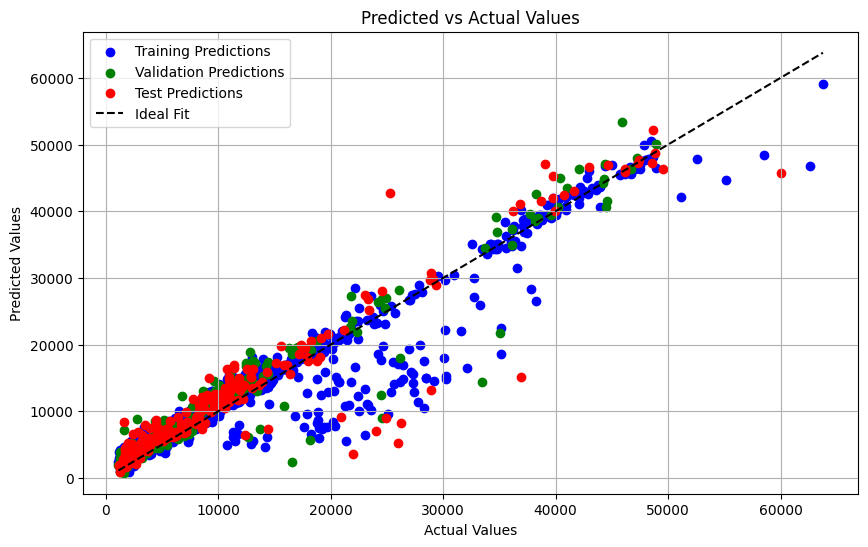

In [153]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train, color='blue', label='Training Predictions')
plt.scatter(y_valid, valid, color='green', label='Validation Predictions')
plt.scatter(y_test, test, color='red', label='Test Predictions')

# Plotting the ideal fit line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--', label='Ideal Fit')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

it fits the data well !!